## Feature Selection

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv('data/df_fe.csv', sep=",", index_col=0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 0 to 4982
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4983 non-null   object 
 1   Stock              4983 non-null   object 
 2   Open               4983 non-null   float64
 3   Low                4983 non-null   float64
 4   Close              4983 non-null   float64
 5   Volume             4983 non-null   float64
 6   30_day_MA          4983 non-null   float64
 7   60_day_MA          4983 non-null   float64
 8   90_day_MA          4983 non-null   float64
 9   SMA_30             4983 non-null   float64
 10  SMA_60             4983 non-null   float64
 11  SMA_90             4983 non-null   float64
 12  EMA_30             4983 non-null   float64
 13  EMA_60             4983 non-null   float64
 14  EMA_90             4983 non-null   float64
 15  RSI                4983 non-null   float64
 16  EMA_12             4983 non-n

In [28]:
df.describe()

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,SMA_30,SMA_60,SMA_90,...,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
count,4983.000000,4983.000000,4983.000000,4.983000e+03,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,...,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,259.294943,253.834808,256.720189,2.979736e+07,255.798546,254.855845,253.890509,255.798546,254.855845,253.890509,...,253.890586,56.153911,256.365420,255.923791,0.441629,0.438867,0.002762,0.178924,701.948224,-0.400161
std,80.257335,79.085633,79.741265,1.264299e+07,80.105382,80.496333,80.896700,80.105382,80.496333,80.896700,...,80.756558,34.692417,79.850552,80.007346,2.168261,2.024397,0.687977,1.998316,482.616253,1.322692
min,56.740002,55.529999,55.910000,8.989200e+06,51.945666,52.309333,50.519333,51.945666,52.309333,50.519333,...,50.523063,0.000000,52.735685,52.177104,-6.925049,-5.925486,-3.023339,-14.739031,153.000000,-2.000000
25%,216.684998,212.825005,214.724998,2.179075e+07,214.026666,213.320666,212.409500,214.026666,213.320666,212.409500,...,212.321271,29.956179,214.615885,214.087768,-0.719073,-0.651546,-0.379777,-0.846559,393.000000,-2.000000
50%,266.739990,259.299988,264.600006,2.664930e+07,262.415332,262.240833,260.916000,262.415332,262.240833,260.916000,...,260.959094,59.601027,262.848663,262.066833,0.724854,0.748739,0.007699,0.169304,608.000000,-1.000000
75%,326.640015,320.079987,322.955002,3.345930e+07,322.671170,322.527083,322.933003,322.671170,322.527083,322.933003,...,323.635396,87.958869,322.968505,323.083009,1.834364,1.724229,0.415283,1.227199,872.000000,1.000000
max,384.299988,378.160004,382.700012,9.701270e+07,380.630674,379.668004,378.683226,380.630674,379.668004,378.683226,...,377.553844,100.000000,382.269296,380.971581,6.306008,5.583934,2.411577,14.216888,5369.000000,2.000000


### Correlation Plot

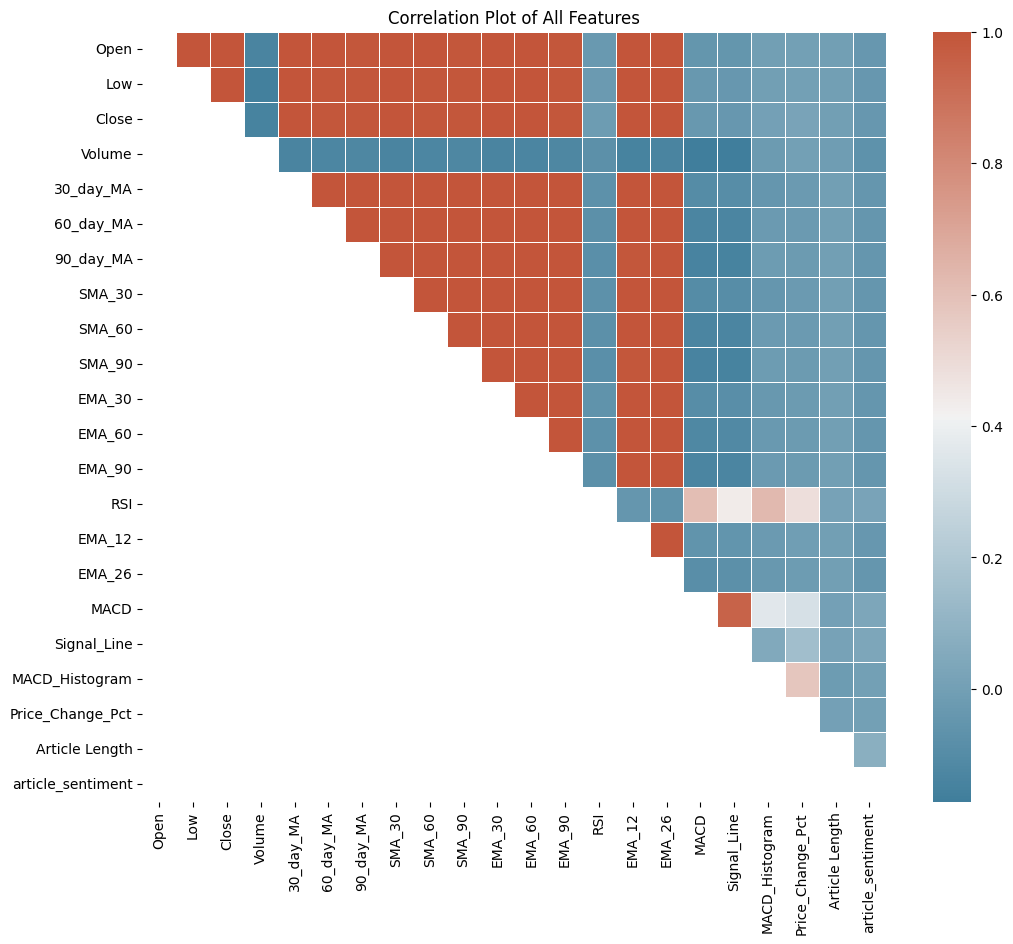

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_numerical.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap without annotations
sns.heatmap(corr, mask=mask, cmap=cmap, annot=False, linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()

In [30]:
# Select only the numerical columns from the DataFrame
df_numerical = df.select_dtypes(include=['int64', 'float64'])
# Correlation Analysis
corr = df_numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,Low,Close,Volume,30_day_MA,60_day_MA,90_day_MA,SMA_30,SMA_60,SMA_90,EMA_30,EMA_60,EMA_90,RSI,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Price_Change_Pct,Article Length,article_sentiment
Open,1.000000,0.999338,0.999460,-0.136302,0.997887,0.995648,0.993629,0.997887,0.995648,0.993629,0.998534,0.996971,0.995422,-0.034416,0.999387,0.998738,-0.048336,-0.049472,-0.006765,-0.000025,-0.004995,-0.043445
Low,0.999338,1.000000,0.999462,-0.160591,0.997311,0.994563,0.992172,0.997311,0.994563,0.992172,0.997987,0.995986,0.994101,-0.028347,0.999172,0.998260,-0.038589,-0.039255,-0.006110,0.000262,-0.004975,-0.040431
Close,0.999460,0.999462,1.000000,-0.148498,0.997124,0.994561,0.992362,0.997124,0.994561,0.992362,0.997890,0.996004,0.994259,-0.019889,0.999161,0.998160,-0.035313,-0.039831,0.005911,0.019828,-0.004777,-0.042393
Volume,-0.136302,-0.160591,-0.148498,1.000000,-0.137483,-0.128583,-0.121859,-0.137483,-0.128583,-0.121859,-0.138264,-0.130728,-0.125535,-0.077031,-0.144322,-0.139501,-0.167451,-0.171769,-0.022308,0.001270,-0.011840,-0.066919
30_day_MA,0.997887,0.997311,0.997124,-0.137483,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,0.999855,0.999256,0.998015,-0.074288,0.999008,0.999803,-0.101597,-0.093127,-0.046171,-0.025583,-0.004963,-0.044094
60_day_MA,0.995648,0.994563,0.994561,-0.128583,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998693,0.999728,0.999458,-0.080134,0.996691,0.998368,-0.133959,-0.133367,-0.029752,-0.026454,-0.005541,-0.045481
90_day_MA,0.993629,0.992172,0.992362,-0.121859,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996895,0.998996,0.999628,-0.081492,0.994493,0.996448,-0.144056,-0.147631,-0.019606,-0.025143,-0.005667,-0.046066
SMA_30,0.997887,0.997311,0.997124,-0.137483,1.000000,0.998659,0.996647,1.000000,0.998659,0.996647,0.999855,0.999256,0.998015,-0.074288,0.999008,0.999803,-0.101597,-0.093127,-0.046171,-0.025583,-0.004963,-0.044094
SMA_60,0.995648,0.994563,0.994561,-0.128583,0.998659,1.000000,0.999167,0.998659,1.000000,0.999167,0.998693,0.999728,0.999458,-0.080134,0.996691,0.998368,-0.133959,-0.133367,-0.029752,-0.026454,-0.005541,-0.045481
SMA_90,0.993629,0.992172,0.992362,-0.121859,0.996647,0.999167,1.000000,0.996647,0.999167,1.000000,0.996895,0.998996,0.999628,-0.081492,0.994493,0.996448,-0.144056,-0.147631,-0.019606,-0.025143,-0.005667,-0.046066


In [31]:
df.columns

Index(['date', 'Stock', 'Open', 'Low', 'Close', 'Volume', '30_day_MA',
       '60_day_MA', '90_day_MA', 'SMA_30', 'SMA_60', 'SMA_90', 'EMA_30',
       'EMA_60', 'EMA_90', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'Price_Change_Pct', 'Article Length',
       'article_sentiment'],
      dtype='object')

C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


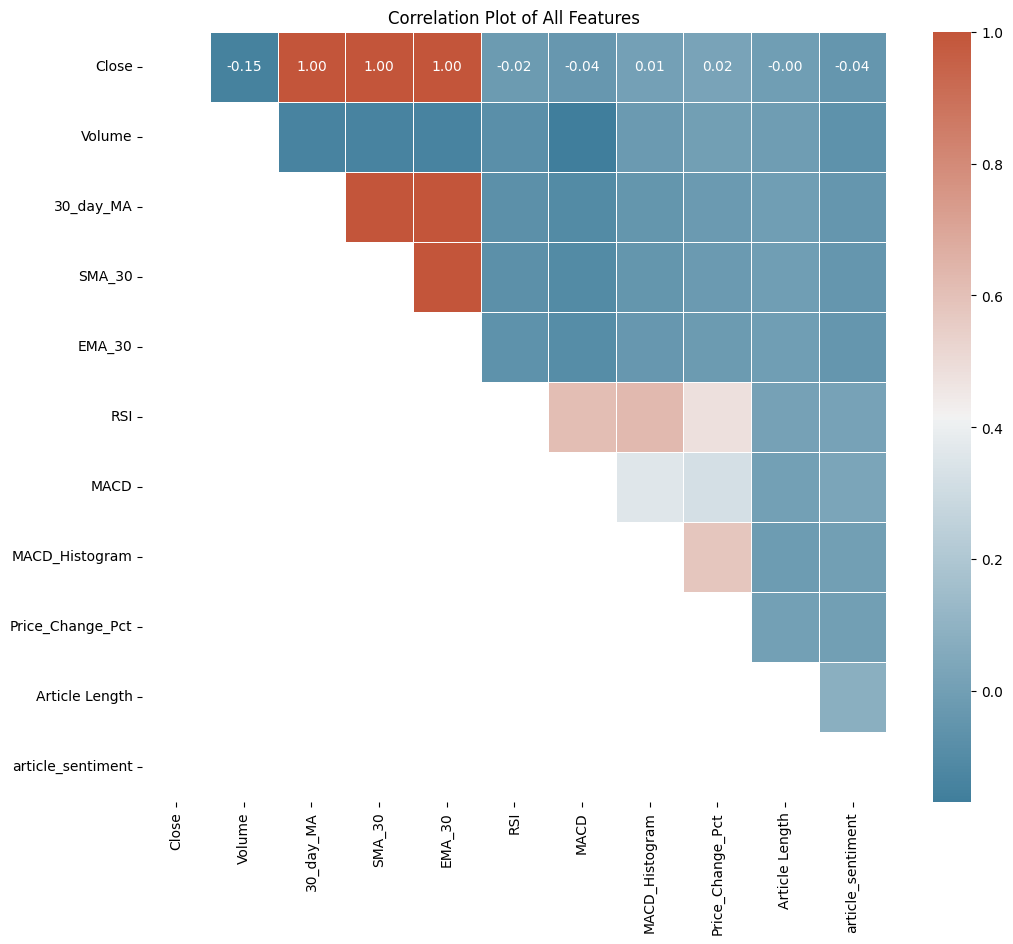

In [33]:
df  = df[['article_sentiment', 'Volume', 'RSI','MACD_Histogram','Close','30_day_MA', 'SMA_30', 'EMA_30', 'MACD', 'Article Length', 'Price_Change_Pct', ]]

corr = df.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap without 'format' in annot_kws
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()

Moving Averages: These columns (30_day_MA, 60_day_MA, 90_day_MA, 30_day_MA.1, 60_day_MA.1, 90_day_MA.1, SMA_30, SMA_60, SMA_90, EMA_30, EMA_60, EMA_90) show extremely high correlations, indicating significant overlap. Retain only one representative column from each type of moving average, such as:
30_day_MA (or SMA_30, EMA_30) for shorter moving averages
60_day_MA (or SMA_60, EMA_60) for medium-term moving averages
90_day_MA (or SMA_90, EMA_90) for longer moving averages
EMA_12 and EMA_26: These exponential moving averages are part of the MACD calculation, which involves EMA_12, EMA_26, and their difference. If MACD is used, EMA_12 and EMA_26 are redundant.
MACD_Histogram: This is derived from MACD and its signal line, representing another level of redundancy. Keeping MACD and Signal_Line should suffice.

#### onehotencoding 

### Backward Elimiation 
finding out which feature go best with "article_sentiment"

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["Price_Change_Pct"], axis=1)  # Exclude target variable and date

y = df["Price_Change_Pct"]  # Target variable

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32).cuda()  # Assuming you have a GPU available
y_tensor = torch.tensor(y.values, dtype=torch.float32).cuda()

# Remove "article_sentiment" from the list of available features
available_features = list(X.columns)
available_features.remove("article_sentiment")

best_features = None
best_mae = float('inf')

# Perform backward elimination
for k in range(len(available_features), 0, -1):
    for combo in combinations(available_features, k):
        # Add "article_sentiment" to the current combination
        combo_with_sentiment = list(combo) + ["article_sentiment"]
        combo_indices = [X.columns.get_loc(col) for col in combo_with_sentiment]
        
        # Create a subset of features
        X_subset = X_tensor[:, combo_indices]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_tensor, test_size=0.2, random_state=42)
        
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train.cpu().numpy())
        X_test_scaled = scaler.transform(X_test.cpu().numpy())
        X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32).cuda()
        X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32).cuda()
        
        # Fit the model
        lin_reg = torch.nn.Linear(X_train_scaled.shape[1], 1).cuda()
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.Adam(lin_reg.parameters(), lr=0.001)
        
        for epoch in range(100):  # Example number of epochs
            optimizer.zero_grad()
            outputs = lin_reg(X_train_scaled)
            loss = criterion(outputs, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()
        
        # Predict on the test data
        with torch.no_grad():
            y_pred = lin_reg(X_test_scaled).cpu().numpy()
        
        # Calculate MAE
        mae = mean_absolute_error(y_test.cpu().numpy(), y_pred)
        
        # Check if MAE is improved
        if mae < best_mae:
            best_mae = mae
            best_features = combo_with_sentiment

print("Best feature combination with 'article_sentiment':", best_features)
print("Best MAE:", best_mae)


C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Best feature combination with 'article_sentiment': ['Close', '30_day_MA', 'SMA_30', 'RSI', 'MACD_Histogram', 'article_sentiment']
Best MAE: 1.1180015


#### Feature Importance

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor 


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


             Feature  Importance
5                RSI    0.315134
1             Volume    0.277254
7     MACD_Histogram    0.159244
6               MACD    0.074289
0              Close    0.060384
8     Article Length    0.028128
4             EMA_30    0.028078
2          30_day_MA    0.026112
3             SMA_30    0.024131
9  article_sentiment    0.007246


C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

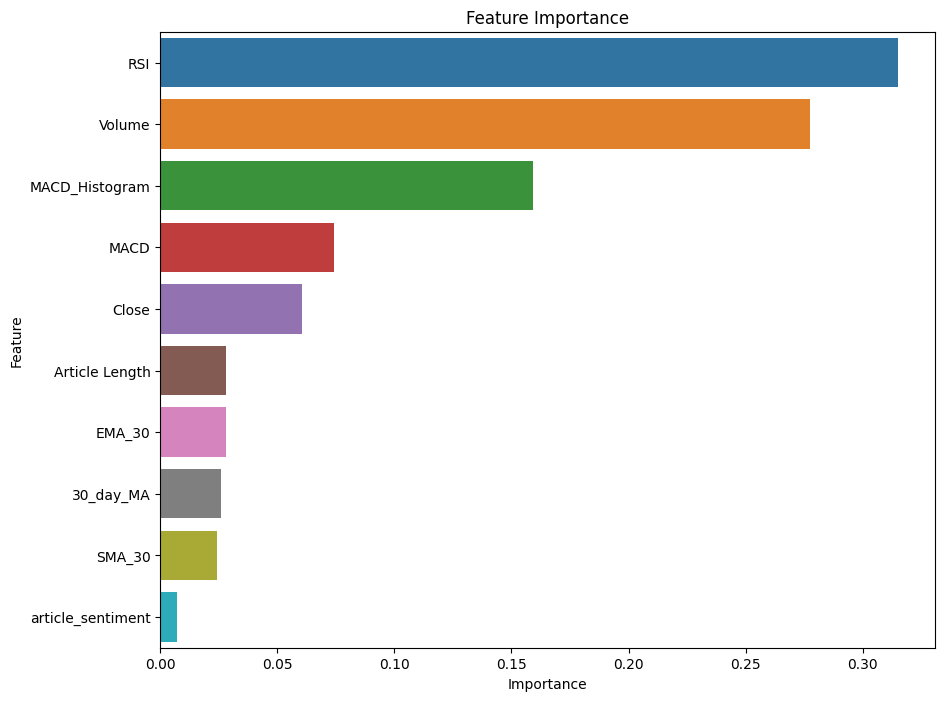

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


Selected features: Index(['Close', 'Volume', '30_day_MA', 'SMA_30', 'EMA_30', 'RSI', 'MACD',
       'MACD_Histogram', 'Article Length', 'article_sentiment'],
      dtype='object')
             Feature  Ranking
0              Close        1
1             Volume        1
2          30_day_MA        1
3             SMA_30        1
4             EMA_30        1
5                RSI        1
6               MACD        1
7     MACD_Histogram        1
8     Article Length        1
9  article_sentiment        1


C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ethan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

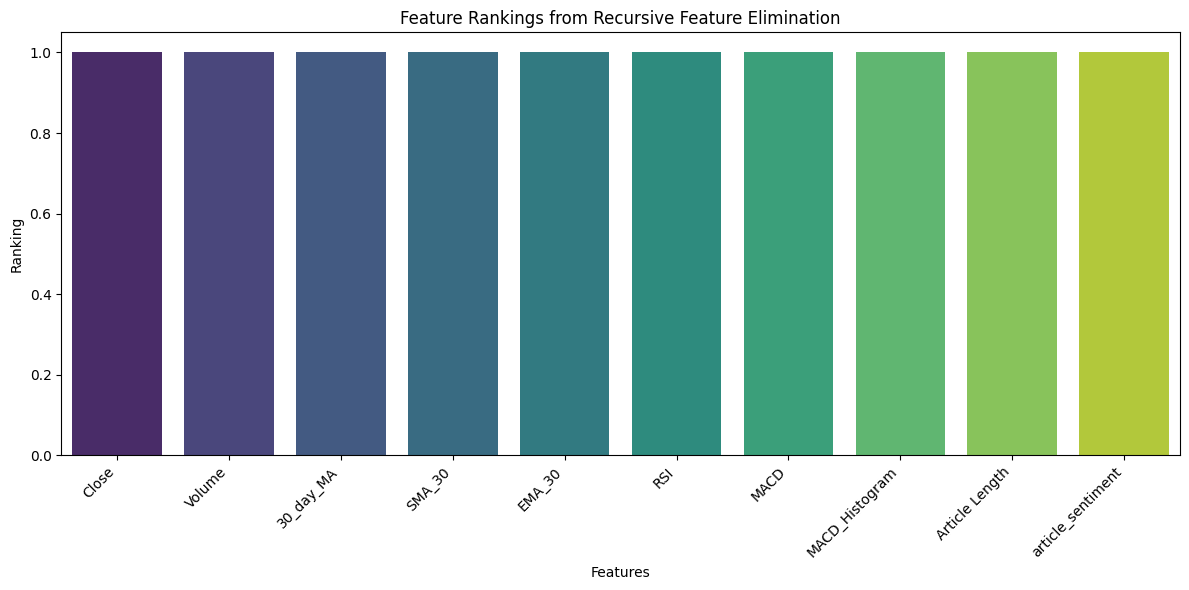

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold the feature rankings
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking
})

# Sort the DataFrame by ranking to ensure the best features are at the top
ranking_df_sorted = ranking_df.sort_values(by='Ranking')

# Create a bar plot of feature rankings
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ranking_df_sorted,
    x='Feature',
    y='Ranking',
    palette='viridis'
)

plt.title("Feature Rankings from Recursive Feature Elimination")
plt.xlabel("Features")
plt.ylabel("Ranking")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()


#### PCA test

##### reduce redundancy 

In [16]:

from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


Number of components to explain 95% variance: 6
Explained variance by component: [0.40426782 0.20869017 0.11106932 0.09758076 0.08946655 0.06029961]


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

[0.40363427 0.2087803  0.11011076 0.09812668 0.09002409 0.06028612]


In [18]:
X_train_pca

array([[ 9.02714696e-01, -1.31700910e+00, -1.52327901e+00,
         1.26233193e+00,  1.32942704e-01, -1.85149173e-03],
       [-1.23640568e+00, -9.90753073e-01,  8.01802028e-01,
        -5.81638080e-01, -6.06553251e-01, -4.79866999e-03],
       [ 7.33766426e-01, -5.48522298e-01,  4.81818606e-01,
         8.85415331e-02, -9.70438638e-01, -1.08351586e+00],
       ...,
       [ 6.64749569e-03,  2.11919205e+00,  1.64257243e+00,
        -6.23840115e-01,  1.05786193e-01,  9.88937842e-01],
       [-1.61069440e+00,  1.02566944e+00, -8.05916270e-01,
        -9.16474797e-01,  9.39757085e-01,  6.83013585e-01],
       [ 2.78332866e+00,  7.17542589e-01, -2.07491112e+00,
         5.57967309e-01, -3.61463099e-01,  1.52725725e+00]])

#### rfe ranking

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recursive Feature Elimination with linear regression
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)  # Selects top 2 features
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Fit linear regression with selected features
selected_features = [feature for feature, rank in zip(X.columns, feature_ranking) if rank == 1]
model.fit(X_train[selected_features], y_train)

# Evaluate the model
y_pred = model.predict(X_test[selected_features])
mse = mean_squared_error(y_test, y_pred)

print("Selected features:", selected_features)
print("Mean Squared Error:", mse)


Selected features: ['Close', 'MACD']
Mean Squared Error: 4.206664617747304


### ANOVA TEST

In [20]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load your dataset
# Example dataset initialization, replace with your dataset
# df = pd.read_csv("your_dataset.csv")

# Set features and target variable
# Drop multiple columns


# Get the F-statistic and p-values for each feature
F, p_values = f_regression(X, y)

# Create a DataFrame to display the features and their p-values
anova_results = pd.DataFrame({"Feature": X.columns, "P-Value": p_values, "F-Statistic": F})

# Select features with a p-value less than a threshold (e.g., 0.05)
significant_features = anova_results[anova_results["P-Value"] < 0.05]["Feature"]

# Train a linear regression model using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[significant_features], y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate the mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output significant features and the model's mean squared error
anova_results_sorted = anova_results.sort_values("P-Value")

anova_results_sorted, significant_features, mse


(             Feature        P-Value  F-Statistic
 7     MACD_Histogram   0.000000e+00  2479.825533
 5                RSI  9.139857e-290  1516.081003
 6               MACD  1.255830e-122   586.717593
 2          30_day_MA   7.095580e-02     3.262165
 3             SMA_30   7.095580e-02     3.262165
 4             EMA_30   1.396726e-01     2.182259
 0              Close   1.616860e-01     1.958968
 8     Article Length   8.257955e-01     0.048448
 9  article_sentiment   9.219594e-01     0.009598
 1             Volume   9.285580e-01     0.008040,
 5               RSI
 6              MACD
 7    MACD_Histogram
 Name: Feature, dtype: object,
 2.997444687486028)

chi square 

In [21]:
from scipy.stats import chi2_contingency
# Check if the 'article_sentiment' and 'Price_Change_Pct' columns are present
if 'article_sentiment' not in df.columns or 'Price_Change_Pct' not in df.columns:
    raise KeyError("Required columns 'article_sentiment' or 'Price_Change_Pct' not found in the dataset.")

# Convert the 'Price_Change_Pct' to a categorical variable ('positive', 'negative', 'neutral')
df['Price_Change_Category'] = df['Price_Change_Pct'].apply(
    lambda x: 'positive' if x > 0 else 'negative'  # You can add a 'neutral' category if needed
)

# Create a contingency table between 'article_sentiment' and 'Price_Change_Category'
contingency_table = pd.crosstab(df['article_sentiment'], df['Price_Change_Category'])

# Calculate the Chi-square statistic and related values
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Return the calculated values
chi2, p, dof, expected

(2.1940818661302997,
 0.7001129068015672,
 4,
 array([[579.96488059, 705.03511941],
        [724.84326711, 881.15673289],
        [ 91.6209111 , 111.3790889 ],
        [720.32992173, 875.67007827],
        [132.24101947, 160.75898053]]))

### article sentiment over time

In [22]:
# Apply a rolling average to smooth out the data
window_size = 5  # You can adjust the window size for more or less smoothing
df['smoothed_sentiment'] = df['article_sentiment'].rolling(window=window_size, min_periods=1).mean()

# Create a plot with both raw and smoothed sentiment, along with a trend line
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['article_sentiment'], marker='o', linestyle='', color='lightgray', alpha=0.5, label='Raw Sentiment')
plt.plot(df['date'], df['smoothed_sentiment'], color='b', linestyle='-', linewidth=2, label='Smoothed Sentiment')

# Fit a linear regression to find the trend line
from scipy.stats import linregress

# Perform linear regression on date and smoothed sentiment (using numeric representation for dates)
dates_numeric = df['date'].astype('int64') // 10**9  # Convert dates to numerical values (seconds since epoch)
slope, intercept, r_value, p_value, std_err = linregress(dates_numeric, df['smoothed_sentiment'])

# Add the trend line
trend_line = intercept + slope * dates_numeric
plt.plot(df['date'], trend_line, color='r', linestyle='--', linewidth=1.5, label='Trend Line')

plt.title('Article Sentiment Over Time (Smoothed with Trend Line)')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)
plt.legend()
plt.show()  # Display the enhanced plot


KeyError: 'date'

<Figure size 1200x600 with 0 Axes>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import combinations

best_features = None
best_mae = float('inf')

# Perform backward elimination
for k in range(len(X.columns), 0, -1):
    for combo in combinations(X.columns, k):
        # Create a subset of features
        X_subset = X[list(combo)]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Fit the model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_scaled, y_train)
        
        # Predict on the test data
        y_pred = lin_reg.predict(X_test_scaled)
        
        # Calculate MAE
        mae = mean_absolute_error(y_test, y_pred)
        
        # Check if MAE is improved
        if mae < best_mae:
            best_mae = mae
            best_features = combo

print("Best feature combination:", best_features)
print("Best MAE:", best_mae)

Best feature combination: ('Open', 'Low', 'Close', '30_day_MA', '60_day_MA', '90_day_MA', 'RSI', 'MACD')
Best MAE: 0.7478196894301868


In [ ]:
df.to_csv('data/df_fs.csv')